## Visualise new constraints

This is to visualise constraint implementation...


In [1]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from IPython.display import display, HTML, Audio

from evoclearn.core import io
from evoclearn.core import samplers
from evoclearn.core import mappings
from evoclearn.core import vocaltractlab as vtl
from evoclearn.core import definitions as defs

In [2]:
#Default sequence:
with open("../etc/JD2_bounds.json") as infh:
    bounds = io.load_bounds(infh)
    seq = io.default_sequence_from_bounds(bounds, labels=["C", "V"])
C_idx = pd.IndexSlice[:, "C"]
V_idx = pd.IndexSlice[:, "V"]

from pprint import pprint
pprint(bounds)

#Load preset targets from speaker file:
speaker = io.SpeakerFile("../etc/JD2_speaker.xml")
preset_g = speaker.vt_target("tb-velar-closure(u)")
# preset_d = speaker.vt_target("tt-alveolar-closure(u)")
preset_O = speaker.vt_target("O")

#Load durations for the two segments, and synthesise from targets:
cv_durs = [0.120, 0.480]
vtl.initialise("../etc/JD2_speaker.xml")

{'HX': {'default': 1.0, 'max': 1.0, 'min': 0.0},
 'HY': {'default': -4.75, 'max': -3.5, 'min': -6.0},
 'JA': {'default': -2.0, 'max': 0.0, 'min': -7.0},
 'JX': {'default': 0.0, 'max': 0.0, 'min': -0.5},
 'LD': {'default': 0.95, 'max': 4.0, 'min': -2.0},
 'LP': {'default': -0.07, 'max': 1.0, 'min': -1.0},
 'TBX': {'default': 2.0, 'max': 4.0, 'min': -3.0},
 'TBY': {'default': 0.5, 'max': 5.0, 'min': -3.0},
 'TCX': {'default': -0.4, 'max': 4.0, 'min': -3.0},
 'TCY': {'default': -1.46, 'max': 1.0, 'min': -3.0},
 'TRX': {'default': 0.0, 'max': 2.0, 'min': -4.0},
 'TRY': {'default': 0.0, 'max': 0.0, 'min': -6.0},
 'TS1': {'default': 0.0, 'max': 1.0, 'min': 0.0},
 'TS2': {'default': 0.0, 'max': 1.0, 'min': 0.0},
 'TS3': {'default': 0.0, 'max': 1.0, 'min': -1.0},
 'TTX': {'default': 3.5, 'max': 5.5, 'min': 1.5},
 'TTY': {'default': -1.0, 'max': 2.5, 'min': -3.0},
 'VO': {'default': -0.1, 'max': 1.0, 'min': -0.1},
 'VS': {'default': 0.0, 'max': 1.0, 'min': 0.0},
 '_AS': {'default': -40.0, 'max'

<CDLL '/home/demitasse/workspace/evoclearn/evl_core/evoclearn/core/VocalTractLabApi.so', handle 3455c50 at 0x7f2f1c62b310>

#### Default sequence

In [3]:
# wav = mappings.synthesise_vtl_curves(mappings.vtl_curves_from_targets(seq, cv_durs))
# io.wav_write(wav, "/tmp/neutral.wav")
# display(HTML(seq.to_html()))
# pl.figure(figsize=(20,2))
# pl.plot(wav)
# pl.show()
# display(Audio("/tmp/neutral.wav"))

#### /gO/ sequence

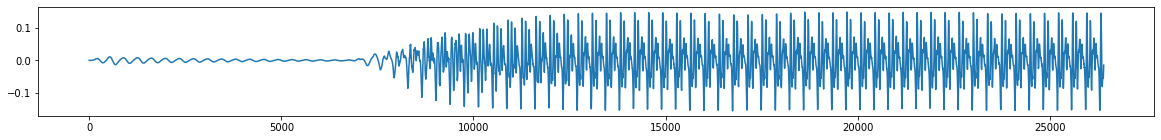

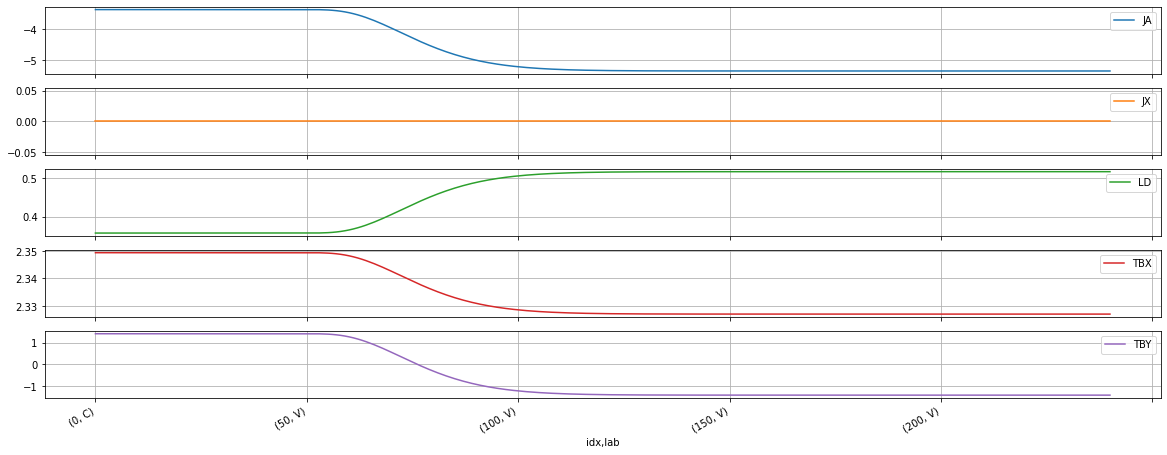

In [4]:
cv_seq = seq.copy()
cv_seq.loc[C_idx, defs.VOCALTRACT_PARAMS] = list(preset_g[list(defs.VOCALTRACT_PARAMS)].iloc[0])
cv_seq.loc[V_idx, defs.VOCALTRACT_PARAMS] = list(preset_O[list(defs.VOCALTRACT_PARAMS)].iloc[0])
# cv_seq.loc[C_idx, ["TTX", "TTY"]] = [4.0, -1.8]
# cv_seq.loc[C_idx, ["TBX", "TBY"]] = [-3.0, 5.0]

motor_program = mappings.vtl_curves_from_targets(cv_seq, cv_durs)

wav = mappings.synthesise_vtl_curves(motor_program)
io.wav_write(wav, "/tmp/cv.wav")
display(HTML(cv_seq.to_html()))
pl.figure(figsize=(20,2))
pl.plot(wav)
pl.show()
display(Audio("/tmp/cv.wav"))
#display(HTML(motor_program.to_html()))
__ = motor_program[["JA", "JX", "LD", "TBX", "TBY"]].plot(subplots=True, figsize=(20,8), grid=True)

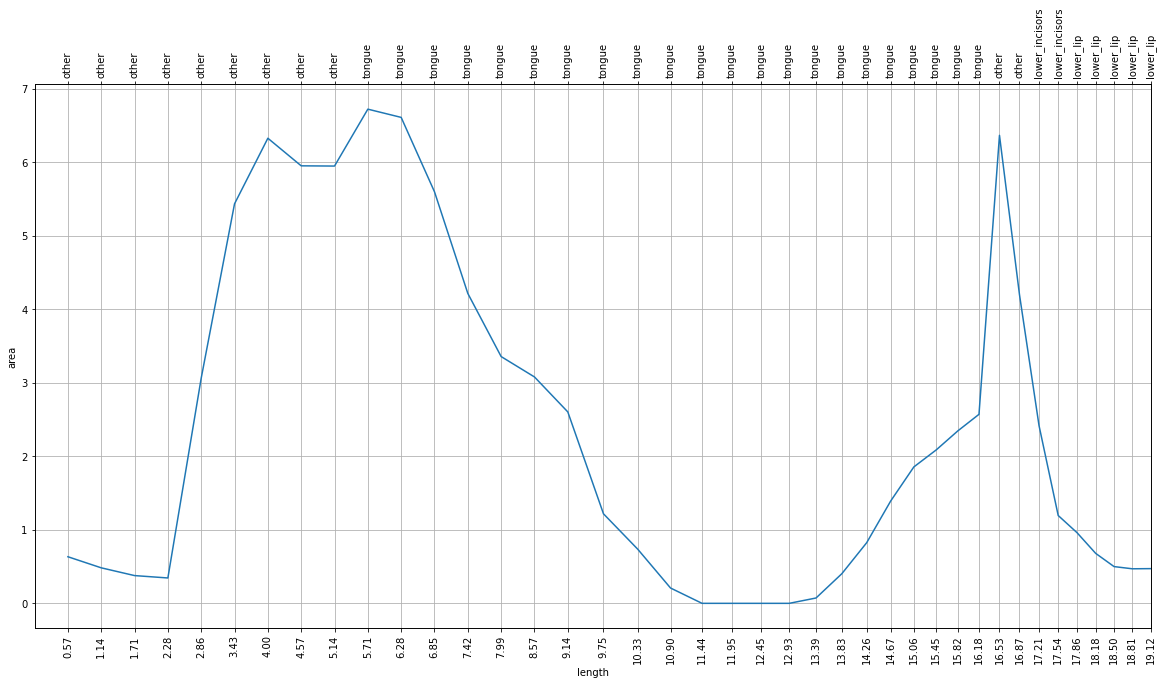

In [5]:
tube = vtl.tube(cv_seq.loc[C_idx, defs.VOCALTRACT_PARAMS])
# display(HTML(tube.tubes.to_html()))
fig = pl.figure(figsize=(20, 10))
ax = fig.add_subplot()
tube_locations = np.cumsum(tube.tubes["tube_length"])
ax.plot(tube_locations, tube.tubes["tube_area"])
ax.set_xlim(0.0, tube_locations[-1])
ax.set_xticks(np.cumsum(tube.tubes["tube_length"]))
ax.set_xlabel("length")
ax.set_ylabel("area")
pl.xticks(rotation=90)
pl.grid()
ax2 = ax.twiny()
ax2.set_xlim(0.0, tube_locations[-1])
ax2.set_xticks(np.cumsum(tube.tubes["tube_length"]))
ax2.set_xticklabels([e[1] for e in tube.tubes.index])
_ = pl.xticks(rotation=90)
